# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
# Install somd additional packages to use
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tabulate

    100% |████████████████████████████████| 51kB 1.8MB/s ta 0:00:011
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /root/.cache/pip/wheels/2b/67/89/414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
from functools import partial
from tabulate import tabulate
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


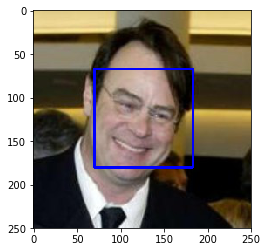

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Number of faces detected: 1


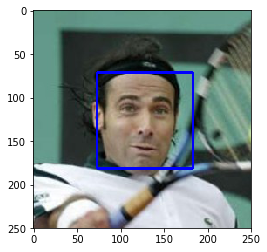

In [4]:
img = cv2.imread(human_files[1])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ See the output below.

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
for i in range(0, 100):
    if face_detector(human_files_short[i]):
        human_count += 1
dog_count = 0
for i in range(0, 100):
    if face_detector(dog_files_short[i]):
        dog_count += 1

print("{} of human face detected out of 100 samples.".format(human_count))
print("{} of dog face detected out of 100 samples.".format(dog_count))

98 of human face detected out of 100 samples.
17 of dog face detected out of 100 samples.


I wrote my own code and implemented some parts from following reference: https://necromuralist.github.io/In-Too-Deep/posts/nano/dog-breed-classifier/dog-app/

In [7]:
def species_scorer(predictor, true_species, false_species, labels):
    misses = [predictor(str(image)) for image in false_species]
    false_positives = sum(misses)
    true_positives = sum([predictor(str(image)) for image in true_species])
    false_negatives = len(true_species) - true_positives
    others = len(false_species)
    expected = len(true_species)
    values = ("{:.2f}%".format(100 * true_positives/expected),
            "{:.2f}%".format(100 * false_positives/others),
              "{:.2f}".format((2 * true_positives)/(2 * true_positives
                                                    + false_positives
                                                    + false_negatives)))
    table = zip(labels, values)
    print(tabulate(table, tablefmt="github", headers=["Metric", "Value"]))
    return misses

In [8]:
face_scorer = partial(species_scorer,
                      true_species=human_files_short,
                      false_species=dog_files_short,
                      labels=("First 100 images in `human_files` detected with a face",
                              "First 100 images in `dog_files` detected with a face",
                              "F1"))

In [9]:
open_cv_false_positives = face_scorer(face_detector)

| Metric                                                 | Value   |
|--------------------------------------------------------|---------|
| First 100 images in `human_files` detected with a face | 98.00%  |
| First 100 images in `dog_files` detected with a face   | 17.00%  |
| F1                                                     | 0.91    |


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

Due to the memory issue, I cleared memory and setup again.

In [1]:
import numpy as np
from functools import partial
from tabulate import tabulate
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [3]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [4]:
device = torch.device("cuda" if use_cuda else "cpu")
print("Using {}".format(device))

Using cuda


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn

IMAGE_SIZE = 224
IMAGE_HALF_SIZE = IMAGE_SIZE//2

vgg_transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(IMAGE_SIZE),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [6]:
def model_predict(image_path: str, model: nn.Module, transform: transforms.Compose):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(str(image_path))
    image = transform(image).unsqueeze(0).to(device)
    output = model(image)
    probabilities = torch.exp(output)
    _, top_class = probabilities.topk(1, dim=1)
    return top_class.item()   

VGG16_predict = partial(model_predict, model=VGG16, transform=vgg_transform)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

According to the image net dictionay, `'Chihuahua'=151` and `'Mexican hairless'=268` are specified. 

In [7]:
DOG_LOWER, DOG_UPPER = 150, 268

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, predictor: callable=VGG16_predict):
    ## TODO: Complete the function.
    
    return DOG_LOWER < VGG16_predict(img_path) < DOG_UPPER

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ See the output below.


In [9]:
def species_scorer(predictor, true_species, false_species, labels):
    misses = [predictor(str(image)) for image in false_species]
    false_positives = sum(misses)
    true_positives = sum([predictor(str(image)) for image in true_species])
    false_negatives = len(true_species) - true_positives
    others = len(false_species)
    expected = len(true_species)
    values = ("{:.2f}%".format(100 * true_positives/expected),
            "{:.2f}%".format(100 * false_positives/others),
              "{:.2f}".format((2 * true_positives)/(2 * true_positives
                                                    + false_positives
                                                    + false_negatives)))
    table = zip(labels, values)
    print(tabulate(table, tablefmt="github", headers=["Metric", "Value"]))
    return misses

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_scorer = partial(species_scorer,
                     true_species=dog_files_short,
                     false_species=human_files_short,
                     labels=("Images in `dog_files_short` with a detected dog",
                             "Images in `human_files_short with a detected dog", "F1"))

In [11]:
VGG_false_dogs = dog_scorer(dog_detector)

| Metric                                           | Value   |
|--------------------------------------------------|---------|
| Images in `dog_files_short` with a detected dog  | 100.00% |
| Images in `human_files_short with a detected dog | 2.00%   |
| F1                                               | 0.99    |


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

## Implementation using Inception

In [12]:
import torch
import torchvision.models as models

inception = models.inception_v3(pretrained=True)
inception.eval()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()

In [13]:
device = torch.device("cuda" if use_cuda else "cpu")
print("Using {}".format(device))

Using cuda


In [14]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn

INCEPTION_IMAGE_SIZE = 299

inception_transforms = transforms.Compose([transforms.Resize(INCEPTION_IMAGE_SIZE),
                                           transforms.CenterCrop(INCEPTION_IMAGE_SIZE),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

inception_predict = partial(model_predict, model=inception, transform=inception_transforms)

In [15]:
inception_dog_detector = partial(dog_detector, predictor=inception_predict)

In [16]:
inception_false_dogs = dog_scorer(inception_dog_detector)

| Metric                                           | Value   |
|--------------------------------------------------|---------|
| Images in `dog_files_short` with a detected dog  | 99.00%  |
| Images in `human_files_short with a detected dog | 1.00%   |
| F1                                               | 0.99    |


## Implementation using ResNet50

Due to the memory issue, I cleared memory and setup again.

In [1]:
import numpy as np
from functools import partial
from tabulate import tabulate
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

I wrote my own code and implemented some parts from following reference: http://kitmarks.com/dog_app.html

In [3]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [4]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [5]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet_predict(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

According to the image net dictionay, `'Chihuahua'=151` and `'Mexican hairless'=268` are specified. 

In [6]:
DOG_LOWER, DOG_UPPER = 150, 268

In [7]:
def Resnet_dog_detector(img_path):
    return DOG_LOWER < ResNet_predict(img_path) < DOG_UPPER

In [8]:
def species_scorer(predictor, true_species, false_species, labels):
    misses = [predictor(str(image)) for image in false_species]
    false_positives = sum(misses)
    true_positives = sum([predictor(str(image)) for image in true_species])
    false_negatives = len(true_species) - true_positives
    others = len(false_species)
    expected = len(true_species)
    values = ("{:.2f}%".format(100 * true_positives/expected),
            "{:.2f}%".format(100 * false_positives/others),
              "{:.2f}".format((2 * true_positives)/(2 * true_positives
                                                    + false_positives
                                                    + false_negatives)))
    table = zip(labels, values)
    print(tabulate(table, tablefmt="github", headers=["Metric", "Value"]))
    return misses

In [9]:
dog_scorer = partial(species_scorer,
                     true_species=dog_files_short,
                     false_species=human_files_short,
                     labels=("Images in `dog_files_short` with a detected dog",
                             "Images in `human_files_short with a detected dog", "F1"))

In [10]:
ResNet50_false_dogs = dog_scorer(Resnet_dog_detector)

| Metric                                           | Value   |
|--------------------------------------------------|---------|
| Images in `dog_files_short` with a detected dog  | 100.00% |
| Images in `human_files_short with a detected dog | 0.00%   |
| F1                                               | 1.00    |


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

Due to the memory issue, I cleared memory and setup again.

In [1]:
# Install somd additional packages to use
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tabulate

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
from functools import partial
from tabulate import tabulate
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [4]:
import os
import torch
from torchvision import datasets

from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

SCRATCH_IMAGE_SIZE = 224

train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(SCRATCH_IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(350),
                                     transforms.CenterCrop(SCRATCH_IMAGE_SIZE),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [5]:
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

I wrote my own code and implemented some parts from following reference: https://necromuralist.github.io/In-Too-Deep/posts/nano/dog-breed-classifier/dog-app/

Specify the path of dataset and data loaders for the dog dataset

In [6]:
path = os.getcwd()  
print ("The current working directory is %s" % path)  

The current working directory is /home/workspace/dog_project


In [7]:
from pathlib import Path

DOG_PATH = Path("/data/dog_images")
dog_training_path = DOG_PATH.joinpath("train")
dog_validation_path = DOG_PATH.joinpath("valid")
dog_testing_path = DOG_PATH.joinpath("test")

In [8]:
training = datasets.ImageFolder(root=str(dog_training_path),
                                transform=train_transform)
validation = datasets.ImageFolder(root=str(dog_validation_path),
                                  transform=test_transform)
testing = datasets.ImageFolder(root=str(dog_testing_path),
                               transform=test_transform)

In [9]:
BATCH_SIZE = 32
WORKERS = 0

train_batches = torch.utils.data.DataLoader(training, batch_size=BATCH_SIZE,
                                            shuffle=True, num_workers=WORKERS)
validation_batches = torch.utils.data.DataLoader(
    validation, batch_size=BATCH_SIZE, shuffle=True, num_workers=WORKERS)
test_batches = torch.utils.data.DataLoader(
    testing, batch_size=BATCH_SIZE, shuffle=True, num_workers=WORKERS)

loaders_scratch = dict(train=train_batches,
                       validation=validation_batches,
                       test=test_batches)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
* I selected the same size as inception_v3 (299 px)
* The training images are resized by cropping and testing images are resized by scaling then cropping.
* The transformation includes rotation, cropping and horizontal flipping.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
BREEDS = len(training.classes)
print("There are {} breeds.".format(BREEDS))

There are 133 breeds.


In [11]:
import torch.nn as nn
import torch.nn.functional as F

LAYER_ONE_IN = 3
LAYER_ONE_OUT = 16
LAYER_TWO_OUT = LAYER_ONE_OUT * 2 # 32
LAYER_THREE_OUT = LAYER_TWO_OUT * 2 # 64
LAYER_FOUR_OUT = LAYER_THREE_OUT * 2 # 128
FLATTEN_TO = (SCRATCH_IMAGE_SIZE//16)**2 * LAYER_FOUR_OUT 
FULLY_CONNECTED_OUT = int(str(FLATTEN_TO)[:3])//100 * 100
KERNEL = 3
PADDING = 1

In [12]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(LAYER_ONE_IN, LAYER_ONE_OUT,
                               KERNEL, padding=PADDING)
        self.conv2 = nn.Conv2d(LAYER_ONE_OUT, LAYER_TWO_OUT,
                               KERNEL, padding=PADDING)
        self.conv3 = nn.Conv2d(LAYER_TWO_OUT, LAYER_THREE_OUT,
                               KERNEL, padding=PADDING)
        self.conv4 = nn.Conv2d(LAYER_THREE_OUT, LAYER_FOUR_OUT,
                               KERNEL, padding=PADDING)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer
        self.fc1 = nn.Linear(FLATTEN_TO, FULLY_CONNECTED_OUT)
        self.fc2 = nn.Linear(FULLY_CONNECTED_OUT, BREEDS)
        # dropout layer
        self.dropout = nn.Dropout(0.25)
        return
    
    ## Define layers of a CNN
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        x = x.view(-1, FLATTEN_TO)
        x = self.dropout(x)

        x = self.dropout(F.relu(self.fc1(x)))
        return self.fc2(x)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I tried several CNN strucure, but most of them showed poor result or unexpected error. 
* 4 convolution layers, which doule the depth while halving the height and width (using MaxPool)
* Flatten the layer with 300 output
* To reduce the likelihood of overfitting, model is applied to dropout the activation layers
* Applied ReLU activation to make the model nonlinear

* Key idea from following reference: https://necromuralist.github.io/In-Too-Deep/posts/nano/dog-breed-classifier/dog-app/

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optimizer

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optimizer.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path,
          print_function: callable=print,
          is_inception: bool=False):

    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    # check the keys are right so you don't waste an entire epoch to find out
    training_batches = loaders["train"]
    validation_batches = loaders["validation"]
    started = datetime.now()
    print_function("Training Started: {}".format(started))
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        epoch_started = datetime.now()
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for data, target in training_batches:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
        train_loss /= len(training_batches.dataset)

        ######################    
        # validate the model #
        ######################
        model.eval()
        for data, target in validation_batches:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
        valid_loss /= len(validation_batches.dataset)
        print_function('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\tElapsed: {}'.format(
            epoch,                     
            train_loss,
            valid_loss,
            datetime.now() - epoch_started,
            ))
        
        if valid_loss < valid_loss_min:
            print_function(
                ("Validation loss decreased ({:.6f} --> {:.6f}). "
                 "Saving model ...").format(
                     valid_loss_min,
                     valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    ended = datetime.now()
    print_function("Training Ended: {}".format(ended))
    print_function("Total Training Time: {}".format(ended - started))            
    return model

In [15]:
class Tee:
    """Save the input to a file and print it

    Args:
     log_name: name to give the log    
     directory_path: path to the directory for the file
    """
    def __init__(self, log_name: str, 
                 directory_name: str="/") -> None:
        self.directory_name = directory_name
        self.log_name = log_name
        self._path = None
        self._log = None
        return

    @property
    def path(self) -> Path:
        """path to the log-file"""
        if self._path is None:
            self._path = Path(self.directory_name).expanduser()
            assert self._path.is_dir()
            self._path = self._path.joinpath(self.log_name)
        return self._path

    @property
    def log(self):
        """File object to write log to"""
        if self._log is None:
            self._log = self.path.open("w", buffering=1)
        return self._log

    def __call__(self, line: str) -> None:
        """Writes to the file and stdout

        Args:
         line: text to emit
        """
        self.log.write("{}\n".format(line))
        print(line)
        return

In [16]:
MODEL_PATH = Path(os.getcwd())
scratch_path = MODEL_PATH.joinpath("model_scratch.pt")
scratch_log = Tee(log_name="scratch_train.log")

In [17]:
EPOCHS = 50

In [18]:
model_scratch = train(EPOCHS, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, scratch_path, print_function=print)

Training Started: 2019-03-29 12:17:10.024883
Epoch: 1 	Training Loss: 4.889926 	Validation Loss: 4.886722	Elapsed: 0:02:24.381522
Validation loss decreased (inf --> 4.886722). Saving model ...
Epoch: 2 	Training Loss: 4.884201 	Validation Loss: 4.880894	Elapsed: 0:02:09.483224
Validation loss decreased (4.886722 --> 4.880894). Saving model ...
Epoch: 3 	Training Loss: 4.876861 	Validation Loss: 4.873463	Elapsed: 0:02:09.916082
Validation loss decreased (4.880894 --> 4.873463). Saving model ...
Epoch: 4 	Training Loss: 4.870756 	Validation Loss: 4.863739	Elapsed: 0:02:09.713751
Validation loss decreased (4.873463 --> 4.863739). Saving model ...
Epoch: 5 	Training Loss: 4.859292 	Validation Loss: 4.845694	Elapsed: 0:02:09.631352
Validation loss decreased (4.863739 --> 4.845694). Saving model ...
Epoch: 6 	Training Loss: 4.835240 	Validation Loss: 4.805572	Elapsed: 0:02:10.250180
Validation loss decreased (4.845694 --> 4.805572). Saving model ...
Epoch: 7 	Training Loss: 4.793548 	Validat

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
model_scratch.load_state_dict(torch.load(scratch_path))

In [20]:
def test(loaders, model, criterion, use_cuda, print_function=print):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print_function('Test Loss: {:.6f}\n'.format(test_loss))

    print_function('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [21]:
scratch_test_log = Tee("scratch_test.log")

In [22]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda, print_function=scratch_test_log)

Test Loss: 3.829041


Test Accuracy: 12% (104/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.require_grad = False

num_features = model_transfer.classifier[6].in_features
features = list(model_transfer.classifier.children())[:-1] 
features.extend([nn.Linear(num_features, BREEDS)]) 
model_transfer.classifier = nn.Sequential(*features)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 116071964.49it/s]


In [25]:
device = torch.device("cuda" if use_cuda else "cpu")
print("Using {}".format(device))

Using cuda


In [26]:
print(model_transfer.classifier[6].out_features)

133


In [27]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I used the classification using VGG16, which has origninally 1000 outputs. I changed final layer to connect 133 outputs. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optimizer.SGD(
    model_transfer.parameters(),
    lr=0.001,
    momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
transfer_model_path = MODEL_PATH.joinpath("model_transfer.pt")

In [30]:
transfer_log = Tee(log_name="transfer_train.log")

In [31]:
EPOCHS = 10

In [32]:
# train the model

model_transfer = train(EPOCHS,
                       loaders=loaders_transfer,
                       model=model_transfer,
                       optimizer=optimizer_transfer,
                       criterion=criterion_transfer,
                       use_cuda=use_cuda,
                       save_path=transfer_model_path,
                       print_function=transfer_log)

Training Started: 2019-03-29 14:05:57.513663
Epoch: 1 	Training Loss: 2.659910 	Validation Loss: 0.978879	Elapsed: 0:07:27.466139
Validation loss decreased (inf --> 0.978879). Saving model ...
Epoch: 2 	Training Loss: 1.487078 	Validation Loss: 0.884303	Elapsed: 0:07:27.558893
Validation loss decreased (0.978879 --> 0.884303). Saving model ...
Epoch: 3 	Training Loss: 1.298901 	Validation Loss: 0.767478	Elapsed: 0:07:27.124205
Validation loss decreased (0.884303 --> 0.767478). Saving model ...
Epoch: 4 	Training Loss: 1.223930 	Validation Loss: 0.747721	Elapsed: 0:07:33.110524
Validation loss decreased (0.767478 --> 0.747721). Saving model ...
Epoch: 5 	Training Loss: 1.108819 	Validation Loss: 0.682093	Elapsed: 0:07:27.486718
Validation loss decreased (0.747721 --> 0.682093). Saving model ...
Epoch: 6 	Training Loss: 1.037946 	Validation Loss: 0.699985	Elapsed: 0:07:27.489589
Epoch: 7 	Training Loss: 0.996577 	Validation Loss: 0.649825	Elapsed: 0:07:27.345043
Validation loss decreased

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [33]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.730682


Test Accuracy: 80% (676/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [34]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in training.classes]

def predict_breed_transfer(image_path):
    # load the image
    image = Image.open(image_path)

    # convert the image to a tensor
    tensor = test_transform(image)

    # add a batch number
    tensor = tensor.unsqueeze_(0)

    # put on the GPU or CPU
    tensor = tensor.to(device)

    # make it a variable
    x = torch.autograd.Variable(tensor)

    # make the prediction
    output = model_transfer(x)
    return class_names[output.data.cpu().numpy().argmax()]

In [35]:
for img in dog_files[1000:1010]:
    print(img)
    print(predict_breed_transfer(img))

/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06779.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06794.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06783.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06801.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06804.jpg
German pinscher
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06787.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06782.jpg
Manchester terrier
/data/dog_images/train/034.Boxer/Boxer_02418.jpg
Boxer
/data/dog_images/train/034.Boxer/Boxer_02391.jpg
Boxer
/data/dog_images/train/034.Boxer/Boxer_02405.jpg
Boxer


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
import numpy as np
from functools import partial
from tabulate import tabulate
from glob import glob

import matplotlib.pyplot as plt                        
%matplotlib inline    

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [37]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [38]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [39]:
device = torch.device("cuda" if use_cuda else "cpu")
print("Using {}".format(device))

Using cuda


Human detector

In [40]:
import cv2                

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def human_detector(img_path):
    img = cv2.imread(str(img_path))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

Dog detector

In [41]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn

IMAGE_SIZE = 224
IMAGE_HALF_SIZE = IMAGE_SIZE//2

vgg_transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(IMAGE_SIZE),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [42]:
def model_predict(image_path: str, model: nn.Module, transform: transforms.Compose):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(str(image_path))
    image = transform(image).unsqueeze(0).to(device)
    output = model(image)
    probabilities = torch.exp(output)
    _, top_class = probabilities.topk(1, dim=1)
    return top_class.item()   

VGG16_predict = partial(model_predict, model=VGG16, transform=vgg_transform)

In [43]:
DOG_LOWER, DOG_UPPER = 150, 268

In [44]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, predictor: callable=VGG16_predict):
    ## TODO: Complete the function.
    
    return DOG_LOWER < VGG16_predict(img_path) < DOG_UPPER

In [45]:
import matplotlib.pyplot as plt
pyplot = plt

def render(image_path: str, species: str, breed: str):
    """Renders the image

    Args:
     image_path: path to the image to render
     species: identified species
     breed: identified breed
    """
    name = " ".join(image_path.name.split(".")[0].split("_")).title()
    figure, axe = pyplot.subplots()
    figure.suptitle("{} ({})".format(species, name), weight="bold")
    axe.set_xlabel("Looks like a {}.".format(breed))
    image = Image.open(image_path)
    axe.tick_params(dict(axis="both",
                         which="both",
                         bottom=False,
                         top=False))
    axe.get_xaxis().set_ticks([])
    axe.get_yaxis().set_ticks([])
    axe_image = axe.imshow(image)
    return

In [46]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img):
    ## handle cases for a human face, dog, and neither
    image_path = Path(img)
    is_dog = dog_detector(image_path)
    is_human = human_detector(image_path)

    if not is_dog and not is_human:
        species = "Error: Neither Human nor Dog"
        breed = "?"
    else:
        breed = predict_breed_transfer(image_path)

    if is_dog and is_human:
        species = "Human-Dog Hybrid"
    elif is_dog:
        species = "Dog"
    elif is_human:
        species = "Human"
    render(image_path, species, breed)
    return

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
* More dataset
* Hyper-parameter tuning process
* Model ensemble
* Additional techniques (ex. Meta-learning)

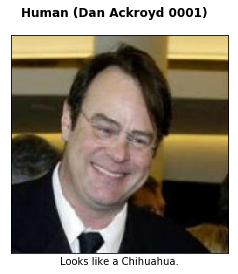

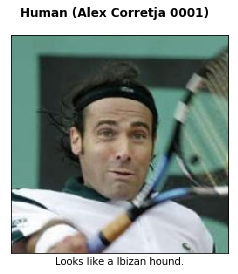

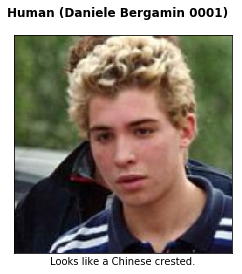

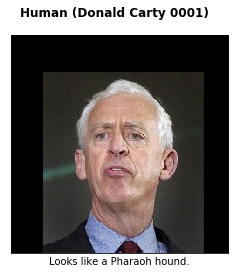

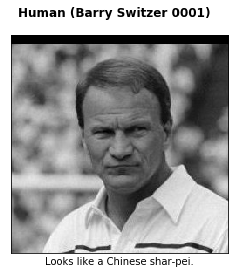

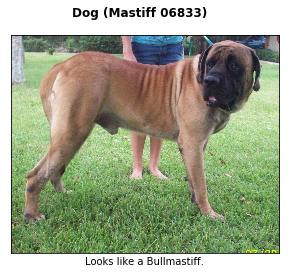

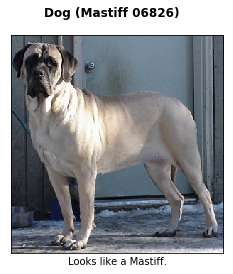

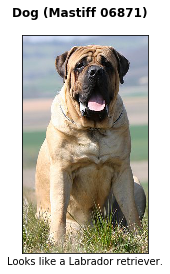

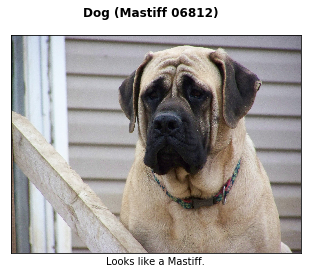

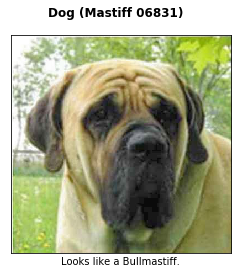

In [47]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)